In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

#Importing necessary modules:
import os
import sys

wpg_path = '/gpfs/exfel/data/user/juncheng/WPG/'
sys.path.insert(0,wpg_path)
pmd_path = '/home/juncheng/src/openPMD-wavefront'
sys.path.insert(0,pmd_path)

import time
import copy
import numpy as np
import pylab as plt
from h5py import File


import wpg

#import SRW core functions
from wpg.srwlib import srwl,SRWLOptD,SRWLOptA,SRWLOptC,SRWLOptT,SRWLOptL,SRWLOptMirEl
from wpg.srwlib import SRWLWfr

#import openpmd reader
from pmd_wavefront.interfaces.srw import srw_wfr_from_openpmd_wavefront

In [3]:
#import SRW helpers functions
from wpg.useful_code.srwutils import AuxTransmAddSurfHeightProfileScaled

#import some helpers functions
from wpg.useful_code.wfrutils import calculate_fwhm_x, plot_wfront, calculate_fwhm_y, print_beamline, get_mesh
from wpg.useful_code.wfrutils import propagate_wavefront

#Import base wavefront class
from wpg import Wavefront
from wpg.beamline import Beamline
from wpg.optical_elements import Empty, Use_PP
#Gaussian beam generator
from wpg.generators import build_gauss_wavefront_xy

from wpg.wpg_uti_wf import calculate_fwhm, averaged_intensity, look_at_q_space, plot_t_wf, plot_wf

In [4]:
with File('../readGenesis/LCLS2_HXR_test4keV0_05QT5.wavefront.h5', 'r') as h5:
    srw_wf = srw_wfr_from_openpmd_wavefront(h5['data']['000000']['meshes'],  iz_step=None, SRWLWfr_class=SRWLWfr)

#init WPG Wavefront helper class
mwf = Wavefront(srw_wf)

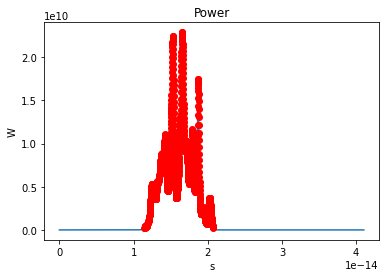

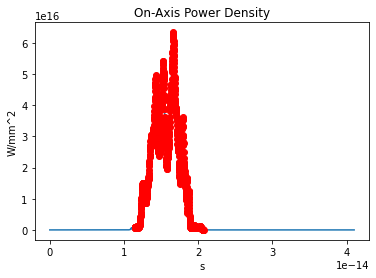

number of meaningful slices: 897
Pulse energy 6.3e-05 J
R-space
(301,) (301,)
FWHM in x = 4.430e-07 m.
FWHM in y = 4.430e-07 m.


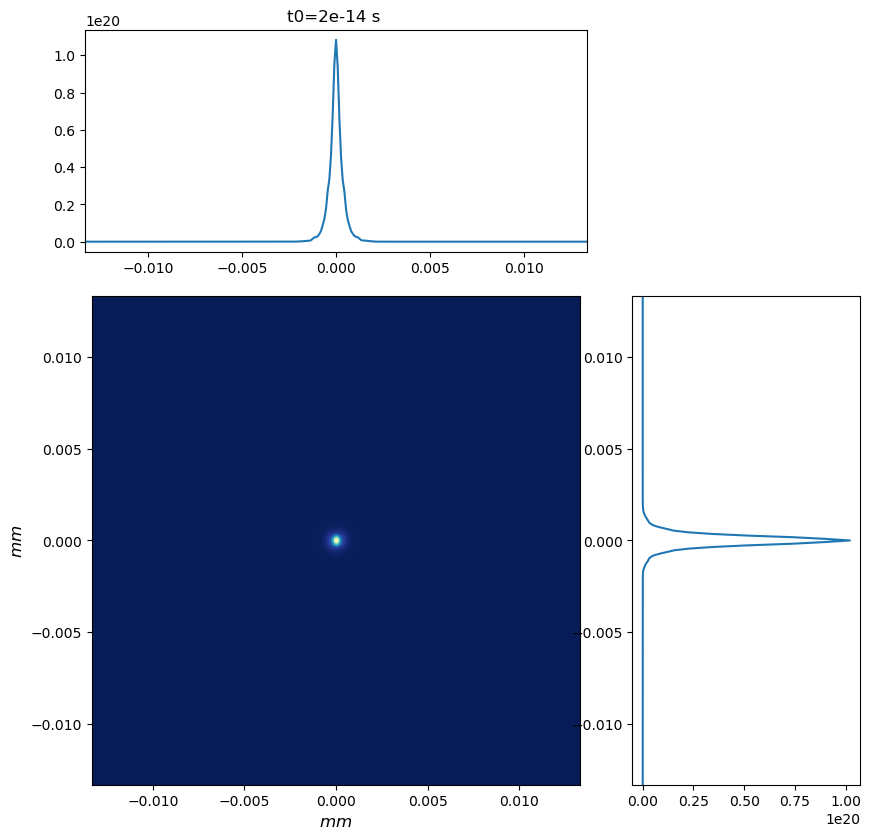

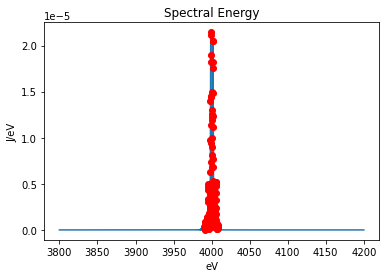

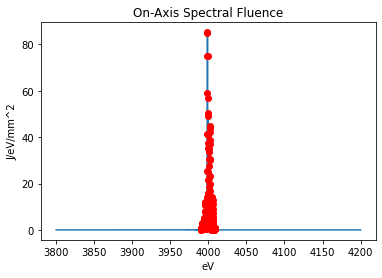

number of meaningful slices: 184
R-space
(301,) (301,)
FWHM in x = 4.430e-07 m.
FWHM in y = 4.430e-07 m.


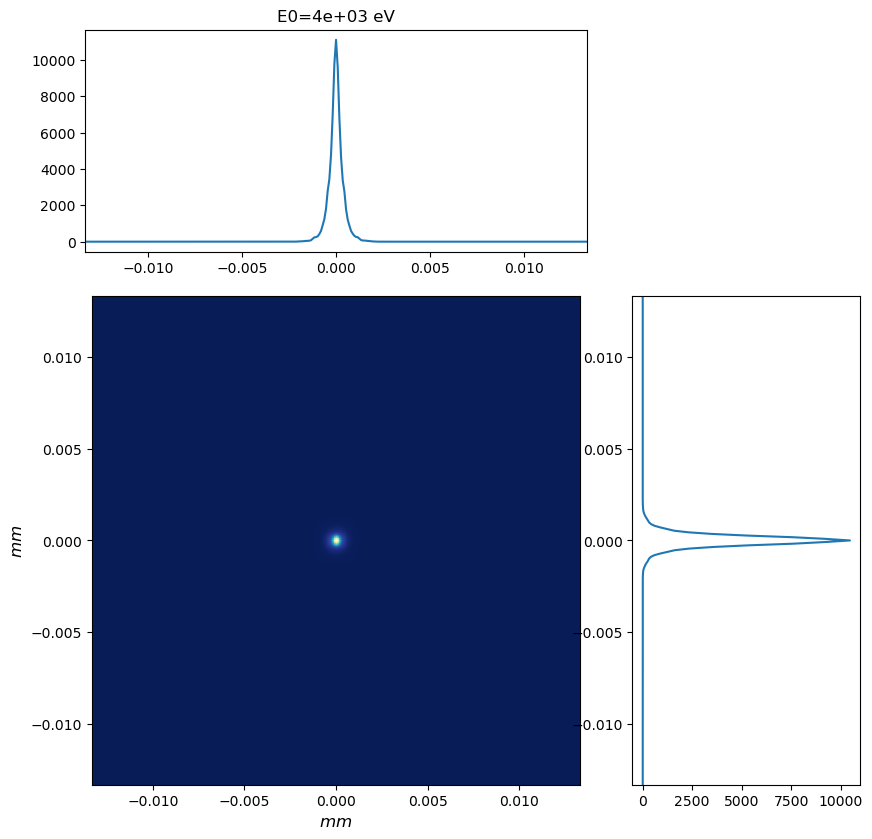

In [5]:
plot_wf(mwf)
srwl.SetRepresElecField(mwf._srwl_wf, 'f')
plot_wf(mwf)

In [9]:
srwl.ResizeElecField(mwf._srwl_wf, 'c', [0, 0.5, 1, 0.5,  1])

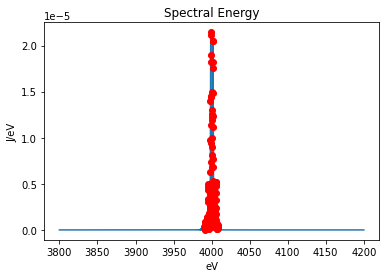

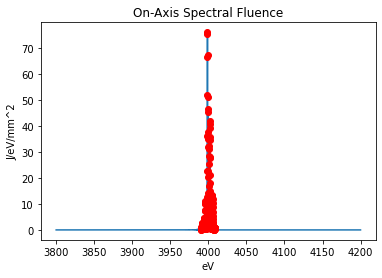

number of meaningful slices: 184
R-space
(126,) (126,)
FWHM in x = 3.527e-07 m.
FWHM in y = 5.291e-07 m.


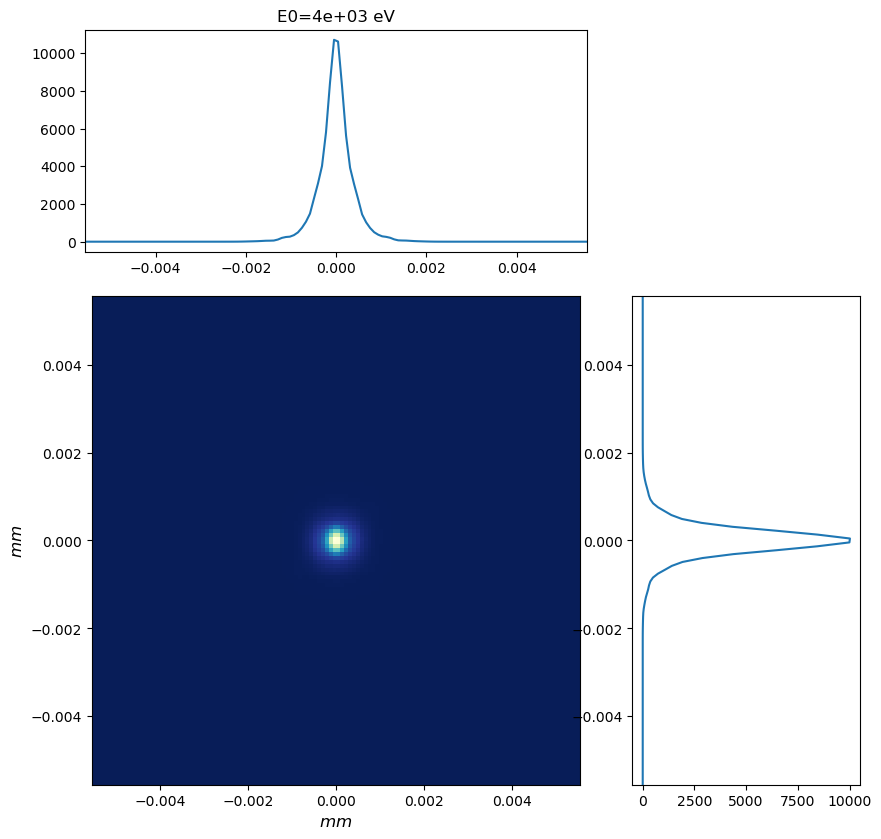

In [11]:
srwl.SetRepresElecField(mwf._srwl_wf, 'f')
plot_wf(mwf)

In [14]:
srwl.SetRepresElecField(mwf._srwl_wf, 'f')
# srwl.ResizeElecField(mwf._srwl_wf, 'f', [0, 0.25, 1])
srwl.ResizeElecField(mwf._srwl_wf, 'f', [0, 0.25, 1])

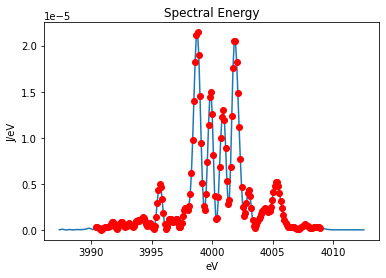

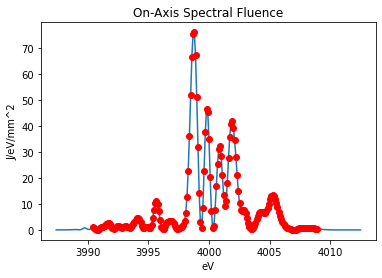

number of meaningful slices: 184
R-space
(126,) (126,)
FWHM in x = 3.527e-07 m.
FWHM in y = 5.291e-07 m.


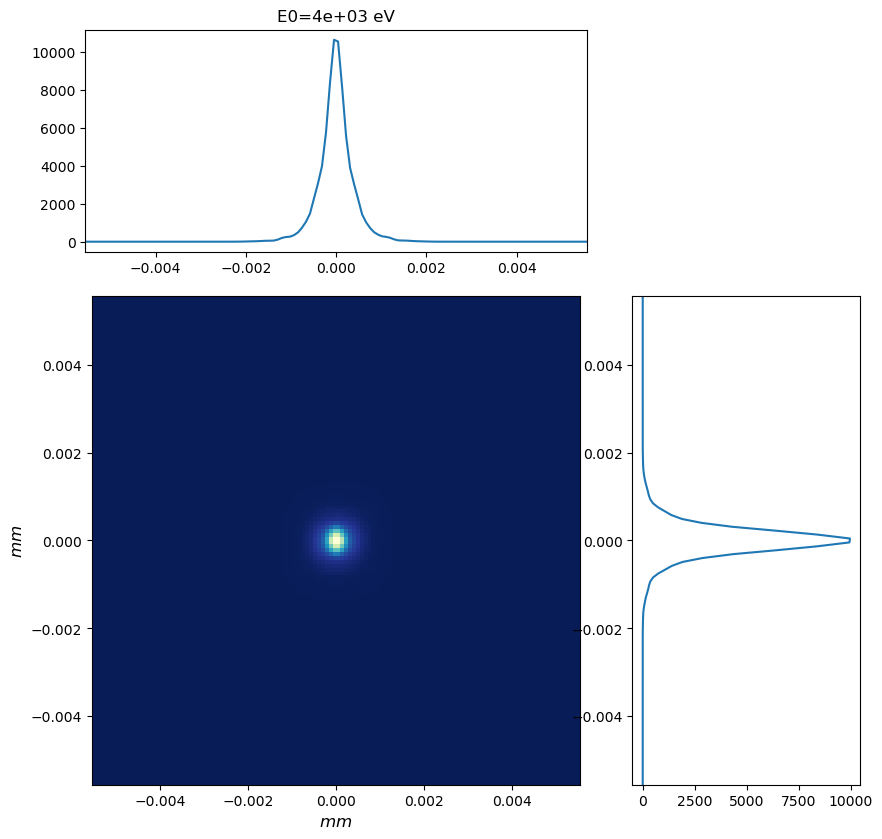

In [15]:
plot_wf(mwf)

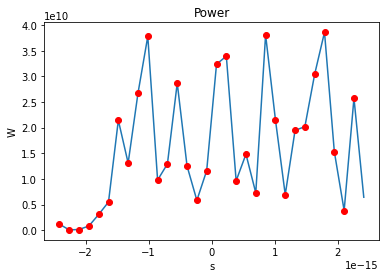

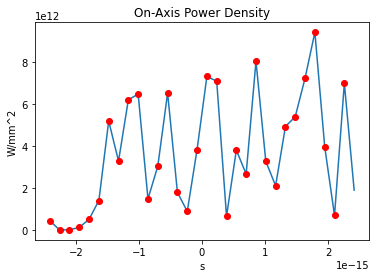

number of meaningful slices: 31
Pulse energy 7.9e-05 J
R-space
(162,) (162,)
FWHM in x = 5.926e-05 m.
FWHM in y = 6.222e-05 m.


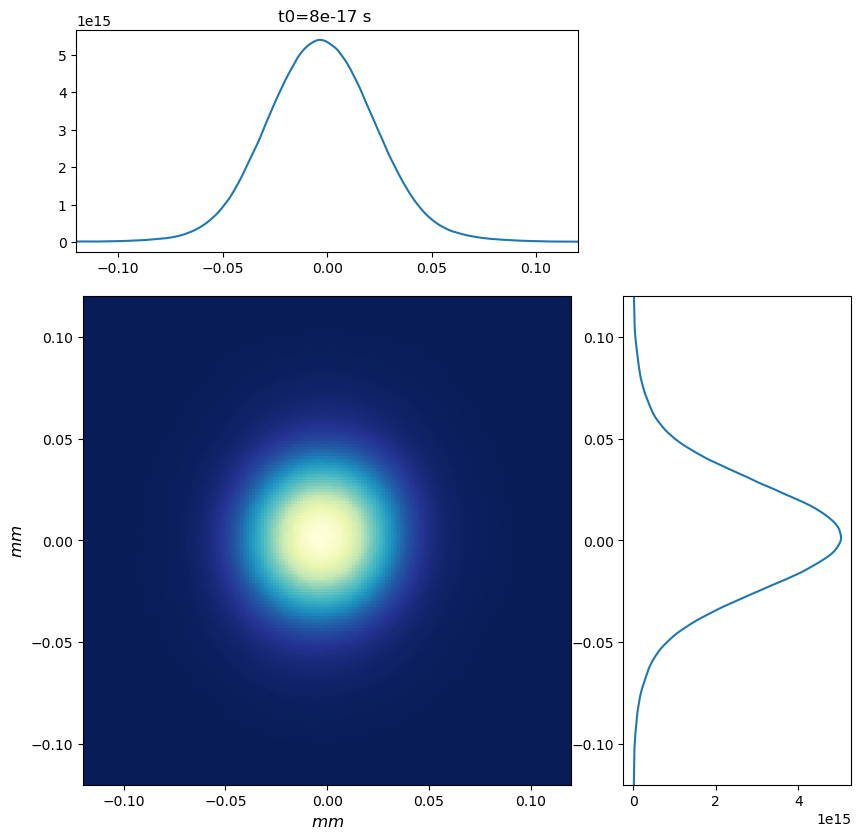

In [97]:
srwl.SetRepresElecField(mwf._srwl_wf, 't')
plot_wf(mwf)

In [16]:
mwf.store_hdf5('trimedGenesisHRX_4keV.h5')